In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Q21. Which demographic patients are prone to get stroke?

In [98]:
df= pd.concat(pd.read_excel('HospitalDatabase.xlsx', sheet_name = ['ReAdmissionRegistry','Patients']), axis = 1, join = 'inner')
#sk = df.loc[df['PrimaryDiagnosis'] == 'Stroke']
print(df)

    ReAdmissionRegistry                                                  \
            AdmissionID PatientID AdmissionDate           DischargeDate   
0                   389         1    2018-01-01 2018-01-04 19:59:31.391   
1                   635         2    2018-01-01 2018-01-04 21:28:51.898   
2                   606         3    2018-01-01 2018-01-04 22:28:23.672   
3                   587         5    2018-01-01 2018-01-05 05:47:04.933   
4                   640         6    2018-01-01 2018-01-05 14:18:30.029   
..                  ...       ...           ...                     ...   
715                 521       738    2018-02-22 2018-03-07 21:22:10.061   
716                 548       739    2018-02-22 2018-03-08 02:43:18.749   
717                 509       740    2018-02-22 2018-03-08 09:27:18.377   
718                 605       741    2018-02-22 2018-03-10 06:06:12.068   
719                 710       742    2018-02-22 2018-03-10 20:38:30.568   

                        

# Q22. Create a dataframe with acuity and EDDisposition as the indices and the count of number of patients as the value.

In [49]:
df = pd.read_excel('HospitalDatabase.xlsx', sheet_name = 'EDVisits', usecols = ['Acuity', 'EDDisposition', 'PatientID'])
df.set_index(['Acuity', 'EDDisposition'])
df.groupby(by = ['Acuity', 'EDDisposition']).count()

PatientID
Acuity EDDisposition           
1      Admitted              32
       Discharged           558
2      Admitted             116
       Discharged            66
3      Admitted              81
4      Admitted             107
       Discharged            30
5      Admitted             179
       Discharged            30

# Q23. Write a function to find the center element in the list. (one element in odd length list,  two elements in even length list).

# Q24. Get the number of patients based on ReasonForVisit and EDDisposition (use stack/unstack functions).

In [106]:
df = pd.read_excel('HospitalDatabase.xlsx', sheet_name = 'EDVisits')
counts = df.groupby(['ReasonForVisit', 'EDDisposition']).size().reset_index(name='No. of patients')
counts = counts.stack()
counts.columns = ['ReasonForVisit', 'EDDisposition', 'No. of patients']
print(counts)

0   ReasonForVisit                Accident
    EDDisposition                 Admitted
    No. of patients                     39
1   ReasonForVisit                Bleeding
    EDDisposition                 Admitted
    No. of patients                     16
2   ReasonForVisit                Bleeding
    EDDisposition               Discharged
    No. of patients                     15
3   ReasonForVisit            Car Accident
    EDDisposition                 Admitted
    No. of patients                     17
4   ReasonForVisit              Chest Pain
    EDDisposition                 Admitted
    No. of patients                     94
5   ReasonForVisit              Chest Pain
    EDDisposition               Discharged
    No. of patients                     15
6   ReasonForVisit                   Cough
    EDDisposition               Discharged
    No. of patients                      1
7   ReasonForVisit                   Fever
    EDDisposition                 Admitted
    No. of 

In [107]:
df = pd.read_excel('HospitalDatabase.xlsx', sheet_name = 'EDVisits')
counts = df.groupby(['ReasonForVisit', 'EDDisposition']).size().reset_index(name='No. of patients')
counts = counts.stack()
counts.columns = ['ReasonForVisit', 'EDDisposition', 'No. of patients']
counts = counts.unstack()
print(counts)

         ReasonForVisit EDDisposition No. of patients
0              Accident      Admitted              39
1              Bleeding      Admitted              16
2              Bleeding    Discharged              15
3          Car Accident      Admitted              17
4            Chest Pain      Admitted              94
5            Chest Pain    Discharged              15
6                 Cough    Discharged               1
7                 Fever      Admitted              46
8                 Fever    Discharged             188
9              Gun Shot      Admitted              16
10         Intoxication    Discharged              30
11           Laceration    Discharged              30
12             Migraine      Admitted              47
13             Migraine    Discharged             109
14            Pneumonia      Admitted             136
15            Pneumonia    Discharged              65
16  Shortness of Breath      Admitted              72
17  Shortness of Breath    D

# Q25. Plot a graph by counting the no. of patients in each department.

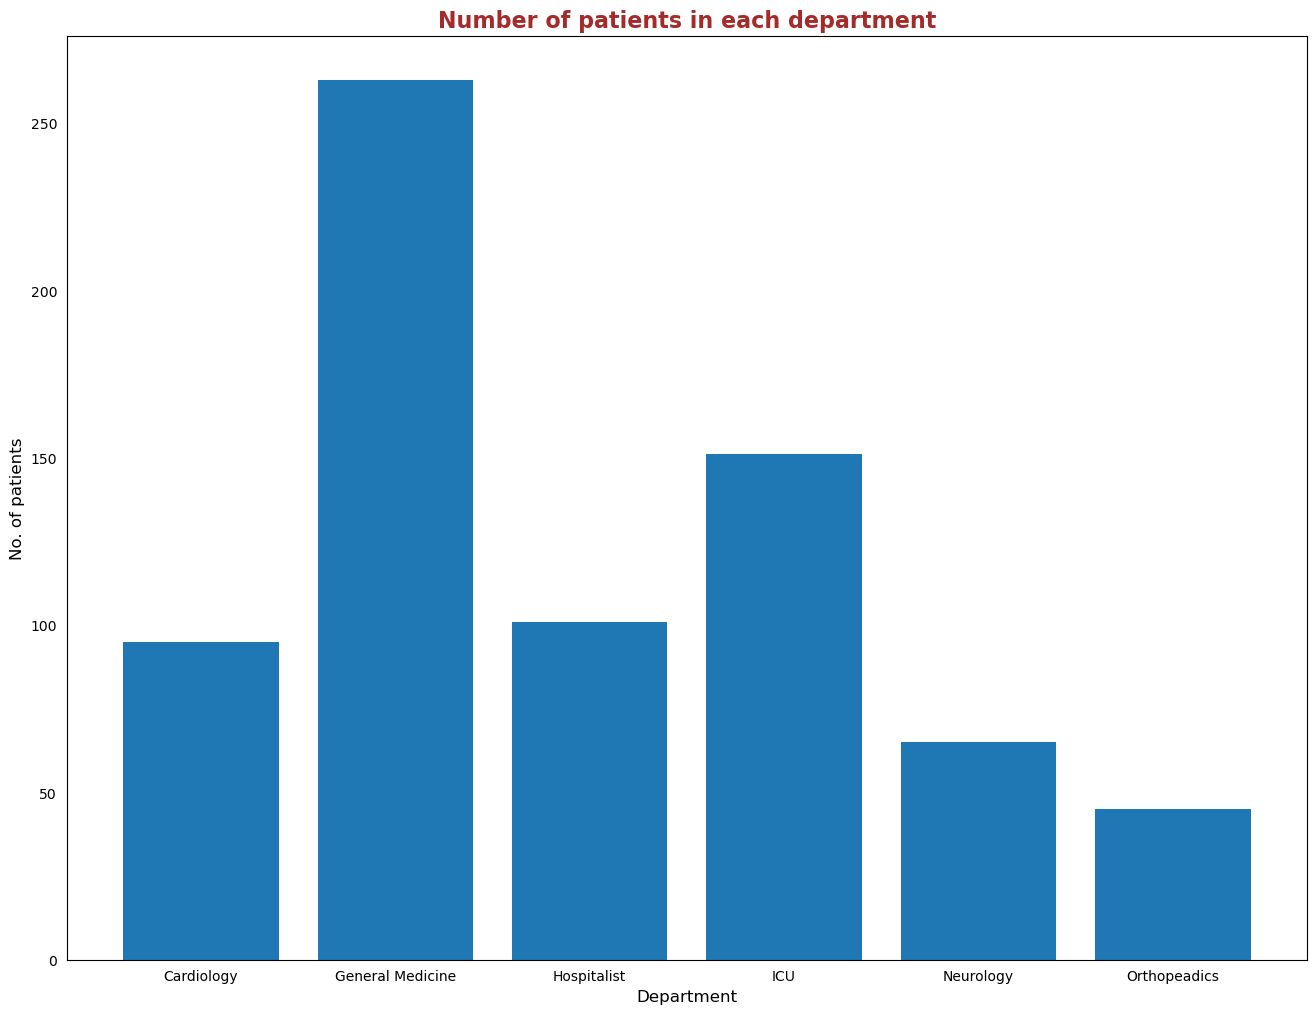

In [85]:
df = pd.read_excel('HospitalDatabase.xlsx', sheet_name = 'ReAdmissionRegistry')
counts = df.groupby('Service').size().reset_index(name='count')
fig, ax = plt.subplots(figsize =(16, 12))
plt.bar(counts['Service'], counts['count'])
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
ax.set_title('Number of patients in each department',
             loc ='center', fontsize = 16, fontweight ='bold',
             color ='Brown', )
ax.set_ylabel('No. of patients', fontsize = 12)
ax.set_xlabel('Department', fontsize = 12)
ax.bar_label
plt.show()

# Q26. Using arrays and loops, find the count of patients based on gender.

# Q27. Plot a graph to count the patients based on discharge disposition.

In [101]:
df = pd.read_excel('HospitalDatabase.xlsx', sheet_name = 'ReAdmissionRegistry')
counts = df.groupby('DischargeDisposition').size().reset_index(name='Total patients')
print(counts)


  DischargeDisposition  Total patients
0              Expired             104
1                 Home             577
2             Transfer              39


# Q28. Which reason of visit has maximum mortality rate.

# Q29. Calculate average LOS.

# Q30. Which patient id has most entries in readmission registry.